# Summary:
---

1. This notebook is a workspace for general scratchwork

### Read Files

In [1]:
import pandas as pd
from Bio import SeqIO

In [2]:
# parse attempt 2 from dataParsing notebook
def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])

    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

In [3]:
virus1 = parseFasta("data/Sclerotinia_biocontrol_mycovirus_nucleotide.fasta")
virus1

,Sequence
ID,
NC_007415.1,CTTTAGTAAATACCACCGCCTCTTAATAAGTCTCGAGGCACTCCCC...
NC_015939.1,GGGGTGATGGGAAACTTACGTTTCGCCAACGTTAAGGTACTGTGAT...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_027139.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_025383.1,AGGGAGTATTATAATTACCTTCGTAGTTGTTCTTACTCTCTGGTAC...


In [4]:
virus01 = parseFasta("data/mycovirus_genbank_all_refseq_nucleotide_unique.fasta")

In [5]:
# put confirmed virus killers at bottom, and removed the duplicates already in the data
virus01 = virus01.append(virus1)
virus01 = virus01.drop_duplicates(keep="last")
virus01

,Sequence
ID,
NC_000960.1,GGGGGTTAGAGAAATCTTGGGAGATTTCTATCGTCATAGACATATG...
NC_001278.1,GGGAAATTTGTGAGATTATCGCCCTAAAGGATAACTCTCATGCGGG...
NC_001492.1,GCCTATGGGTGGTCTACATAGGTGAGCATGCGTTGCTCGATATAGA...
NC_001633.1,ACAAAATAATTGAAGAAATTATTTTTGTTTTACATATTTAGATCTT...
NC_001641.1,GAATTTTTCGGTGAACCGGAATTATGTCGTCTCTGTTAAATTCATT...
...,...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...


### Make KMER Table

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# testing
tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(1,2))
s_hat = tfid_vector.fit_transform(virus1.Sequence)
kmers = s_hat.toarray()
kmerNames = tfid_vector.get_feature_names()

In [8]:
# kmer table with kmers of length a to b
def kmerXTable(s, a, b):
    tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tfid_vector.fit_transform(s.Sequence)
    kmerNames = tfid_vector.get_feature_names()
    kmers = s_hat.toarray()
    return pd.DataFrame(kmers,columns=kmerNames, index = s.index)

In [9]:
kmer7Table1 = kmerXTable(virus1, 7,7)
kmer7Table1

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [10]:
kmer27Table1 = kmerXTable(virus1, 2,7)

In [11]:
kmer7Table01 = kmerXTable(virus01, 7,7)

In [12]:
kmer27Table01 = kmerXTable(virus01, 2,7)

### Find importance of KMERs

In [13]:
# all columns that contain zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) == True]

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [14]:
# all columns that do not contain any zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]

,aaaacaa,aactttt,aagatga,aatcaaa,acaaata,agaagaa,agatttc,aggaatt,aggagat,aggttga,...,tcaagga,tcacaag,tcttgga,tggaaag,tggaatt,ttcaaag,ttctttc,ttgaaga,ttggaaa,ttttgat
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.012511,0.006255,0.018766,0.012511,0.006255,0.006255,0.006255,0.006255,0.006255,0.006255,...,0.012511,0.012511,0.006255,0.012511,0.006255,0.006255,0.006255,0.012511,0.012511,0.018766
NC_015939.1,0.008311,0.004155,0.008311,0.012466,0.004155,0.024932,0.004155,0.008311,0.008311,0.004155,...,0.008311,0.004155,0.004155,0.004155,0.004155,0.004155,0.008311,0.004155,0.004155,0.016621
NC_022896.1,0.003280,0.013119,0.013119,0.003280,0.003280,0.013119,0.003280,0.009840,0.006560,0.003280,...,0.009840,0.009840,0.013119,0.009840,0.006560,0.019679,0.006560,0.016399,0.003280,0.013119
NC_026510.1,0.011075,0.022150,0.022150,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,...,0.011075,0.011075,0.011075,0.011075,0.011075,0.022150,0.011075,0.022150,0.011075,0.011075
NC_027138.1,0.012197,0.006098,0.018295,0.018295,0.012197,0.012197,0.006098,0.012197,0.006098,0.006098,...,0.006098,0.006098,0.006098,0.006098,0.006098,0.012197,0.006098,0.012197,0.012197,0.006098
NC_027139.1,0.019285,0.006428,0.006428,0.006428,0.019285,0.012857,0.006428,0.006428,0.006428,0.006428,...,0.006428,0.006428,0.012857,0.006428,0.006428,0.012857,0.006428,0.038570,0.006428,0.012857
NC_025383.1,0.021211,0.004242,0.008484,0.004242,0.004242,0.016969,0.008484,0.008484,0.029696,0.004242,...,0.004242,0.004242,0.004242,0.004242,0.008484,0.008484,0.004242,0.008484,0.004242,0.004242


In [15]:
#kmer7TableNonZero1 = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]
#kmer7TableNonZero1.hist()

In [16]:
# labels for virus01
labels = [0 for x in range(343)] + [1 for x in range(7)]

## Models
-----

### Unsupervised:

Only the 1 labels are known, everything else is unknown, so I'm attempting to find clusters in the data in which all the 1 labels reside

#### KMeans
I'm trying a variety of different features to try to get a cluster containing the 1s

#### KMeans (try 1)

In [17]:
from sklearn.cluster import KMeans
km1 = KMeans(random_state = 42, n_clusters = 2)
km1.fit(kmer27Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
# last 7 numbers in array are clusters for virus killers. We want these to all be the same
y_hat1 = km1.predict(kmer27Table01)
y_hat1[343:]

array([0, 0, 1, 0, 1, 1, 0])

In [19]:
print(len(kmer27Table01.columns))
print(len(kmer7Table01.columns))

22789
16641


In [20]:
# Visulization attempt

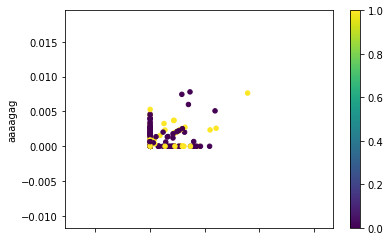

In [21]:
# KMeans labels
kmer27Table01.plot.scatter(x=7, y=49, c=y_hat1, cmap="viridis")

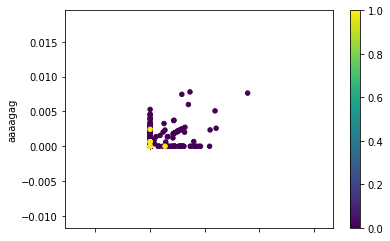

In [22]:
# actual labels
kmer27Table01.plot.scatter(x=7, y=49, c=labels, cmap="viridis")

#### KMeans (try 2)

In [23]:
km2 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in and kmer legnths 2 to 7
cols2 = kmer27Table1.loc[:, (kmer27Table1 == 0).any(axis=0) != True].columns
km2.fit(kmer27Table01[cols2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
# last 7 numbers in array are clusters for virus killers
y_hat2 = km2.predict(kmer27Table01[cols2])
y_hat2[343:]

array([0, 0, 1, 0, 1, 1, 0])

#### KMeans (try 3)

In [25]:
km3 = KMeans(random_state = 42, n_clusters = 2)
# only use kmers of length 7
km3.fit(kmer7Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [26]:
# last 7 numbers in array are clusters for virus killers
y_hat3 = km3.predict(kmer7Table01)
y_hat3[343:]

array([1, 1, 1, 1, 0, 0, 1])

#### KMeans (try 4) best!

In [27]:
km4 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in for kmer length 7
cols4 = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
km4.fit(kmer7Table01[cols4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [28]:
# last 7 numbers in array are clusters for virus killers
y_hat4 = km4.predict(kmer7Table01[cols4])
y_hat4[343:]

array([1, 1, 1, 1, 1, 1, 1])

In [29]:
y_hat4

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [30]:
print(len(kmer7Table01[cols4].columns))

34


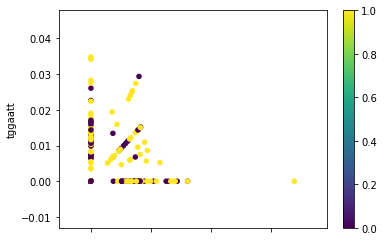

In [31]:
# KMeans labels
kmer7Table01[cols4].plot.scatter(x=7, y=28, c=y_hat4, cmap="viridis")

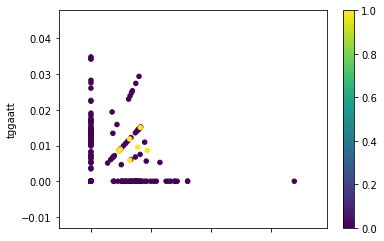

In [32]:
# confirmed labels
kmer7Table01[cols4].plot.scatter(x=7, y=28, c=labels, cmap="viridis")

#### PCA
Same with KMeans, I'm trying a variety of different features. I'm also graphing kmeans (try4) labels on the same graph as the PCA graphs to better see clusters.

#### PCA (try 1)

In [33]:
from sklearn.decomposition import PCA
embedding1 = PCA()
embedding1.fit(kmer27Table01)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
dimensions1 = pd.Index(range(1,embedding1.n_components_ + 1), name="dimensions")
dimensions_ratio1 = pd.Series(embedding1.explained_variance_ratio_, index=dimensions1)
dimensions_ratio1.head()

dimensions
1    0.348472
2    0.127270
3    0.049630
4    0.037235
5    0.034573
dtype: float64

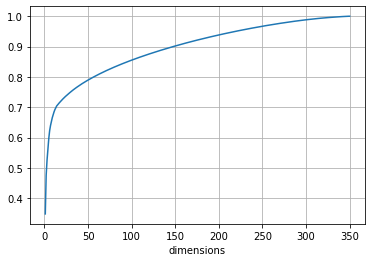

In [35]:
# Importance of each dimension
dimensions_ratio1.cumsum().plot(grid=True)

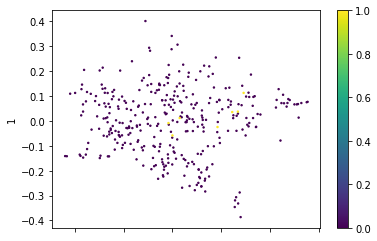

In [36]:
# Plotting the two most important dimensions against each other
import matplotlib.pyplot as plt

show1 = pd.DataFrame(embedding1.transform(kmer27Table01))
show1.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

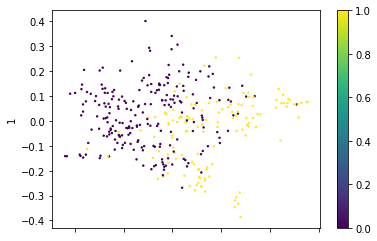

In [37]:
# kmeans (try4) clustering
show1.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)

#### PCA (try 2) best!

In [38]:
embedding2 = PCA()
# only use columns that confirmed virus killers have no zeros in for kmer length 7
cols = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
embedding2.fit(kmer7Table01[cols])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
dimensions2 = pd.Index(range(1,embedding2.n_components_ + 1), name="dimensions")
dimensions_ratio2 = pd.Series(embedding2.explained_variance_ratio_, index=dimensions2)
dimensions_ratio2.head()

dimensions
1    0.147604
2    0.067802
3    0.052073
4    0.049220
5    0.043775
dtype: float64

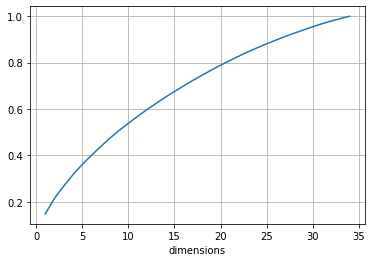

In [40]:
# Importance of each dimension
dimensions_ratio2.cumsum().plot(grid=True)

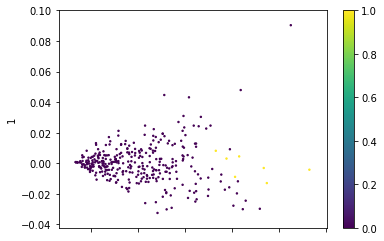

In [41]:
# Plotting the two most important dimensions against each other
import matplotlib.pyplot as plt

# Confirmed labels
show2 = pd.DataFrame(embedding2.transform(kmer7Table01[cols4]))
show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

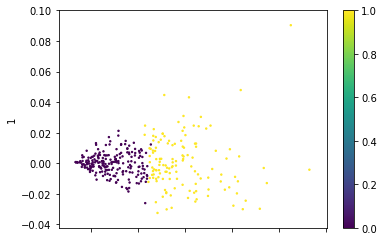

In [42]:
# kmeans clustering
show2.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)

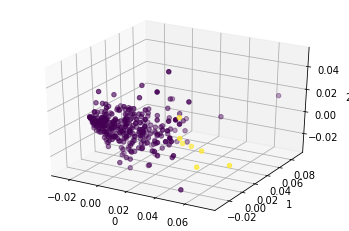

In [43]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().gca(projection='3d')
ax.scatter(show2[0], show2[1], show2[2], c=labels, cmap='viridis')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

#### Spectral Clustering with PCA (try 2)

In [44]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, random_state=0).fit(show2)

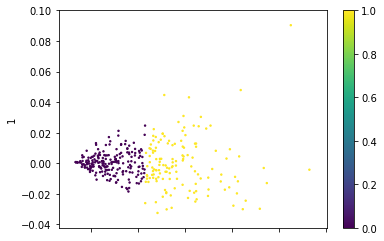

In [59]:
# Clustering labels
show2.plot.scatter(x=0, y=1, style="o", c=clustering.labels_, cmap = "viridis", s=2)

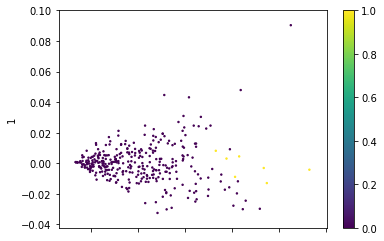

In [46]:
# Confirmed labels
show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

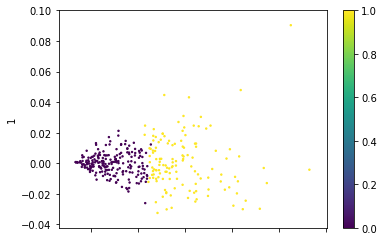

In [47]:
# Kmeans clustering
show2.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)

#### Mean Shift
Trying to eliminate effect of common clusters. Lot's of work still needed, but if common kmers can be removed to better illustrate feature importance, clusterng methods will work alot better.

#### Mean Shift (try 1)

In [49]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(show1)
cluster_centers = ms.cluster_centers_

Text(0, 0.5, '1')

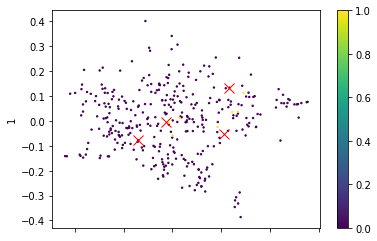

In [50]:
ax = show1.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=100, linewidth=1)
ax.set_xlabel('0')
ax.set_ylabel('1')

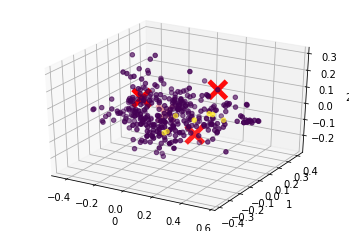

In [51]:
ax = plt.figure().gca(projection='3d')
ax.scatter(show1[0], show1[1], show1[2], c=labels, cmap='viridis')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

#### Mean Shift (try 2)

In [52]:
ms = MeanShift()
ms.fit(show2)
cluster_centers = ms.cluster_centers_

Text(0, 0.5, '1')

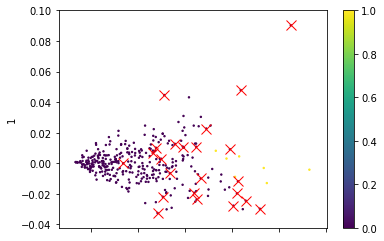

In [53]:
ax = show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=100, linewidth=1)
ax.set_xlabel('0')
ax.set_ylabel('1')